## Session 5: Network Analysis

In [2]:
# import dependencies 
import os

# data anaylsis 
import pandas as pd
from tqdm import tqdm # feedback (progression bar)

# NLP
import spacy
nlp = spacy.load("en_core_web_sm")

### Read data

In [2]:
input_file = os.path.join("..", "data", "fake_or_real_news.csv")

In [3]:
data = pd.read_csv(input_file)

__Filter dataframe__

In [4]:
real_df = data[data["label"]=="REAL"]["text"]

In [5]:
real_df.sample(2)

2800    Trump gained 8 points since August to land at ...
4466    Sen. Marco Rubio (R-Fla.) said on Sunday that ...
Name: text, dtype: object

### Extract entities

In [7]:
post_entities = []

for post in tqdm(real_df):
    # create temporary list
    tmp_list = []
    # create spacy doc object
    doc = nlp(post)
    # for every named entitiy in the doc
    for entitiy in doc.ents:
        if entitiy.label_ == "PERSON":
            tmp_list.append(entitiy.text)
    # add tmp_list to main list
    post_entities.append(tmp_list)

100%|██████████| 3171/3171 [08:08<00:00,  6.49it/s]


### Create edgelist using `itertools.combinations()`

In [8]:
from itertools import combinations

In [9]:
edgelist = []

# iterate over every document 
for doc in post_entities:
    # take all combinations in the doc in pairs
    edges = list(combinations(doc, 2))
    # for each combination (pair)
    for edge in edges:
        # append this to final edge list
        edgelist.append(tuple(sorted(edge)))
        # sorted sorts them so that we don't have duplicates in different order

In [16]:
print(sorted(("Jane", "Mary")))
print(sorted(("Mary", "Jane")))

['Jane', 'Mary']
['Jane', 'Mary']


### Counting edges

In [10]:
from collections import Counter

In [20]:
# count all edges, and return the 10 most common
Counter(edgelist).most_common(10)

[(('Clinton', 'Clinton'), 1861),
 (('Cruz', 'Cruz'), 742),
 (('Clinton', 'Trump'), 658),
 (('Clinton', 'Cruz'), 541),
 (('Cruz', 'Trump'), 410),
 (('Clinton', 'Hillary Clinton'), 379),
 (('Clinton', 'Donald Trump'), 326),
 (('Bush', 'Jeb'), 279),
 (('Bush', 'Bush'), 258),
 (("Bill Clinton's", 'Clinton'), 207)]

In [12]:
counted_edges = []

for pair, weight in Counter(edgelist).items():
    nodeA = pair[0]
    nodeB = pair[1]
    counted_edges.append((nodeA, nodeB, weight))
    
# weight = total occurance they appear togehter across the data

In [ ]:
len(counted_edges)

### Create dataframe

In [13]:
edges_df = pd.DataFrame(counted_edges, columns=["nodeA", "nodeB", "weight"])

In [ ]:
filtered_df = edges_df[edges_df["weight"] > 500]

In [14]:
# save dataframe for assignment
edges_df.to_csv("../data/weighted_edgelist_realnews.csv")

### Create network

In [3]:
# import saved file 
df = pd.read_csv("../data/weighted_edgelist_realnews.csv")
filtered_df = df[df["weight"] > 500]

In [118]:
import networkx as nx
import matplotlib.pyplot as plt
import math

In [5]:
G = nx.from_pandas_edgelist(filtered_df, "nodeA", "nodeB", ["weight"])

In [6]:
# plot it
pos = nx.nx_agraph.graphviz_layout(G, prog = "neato")

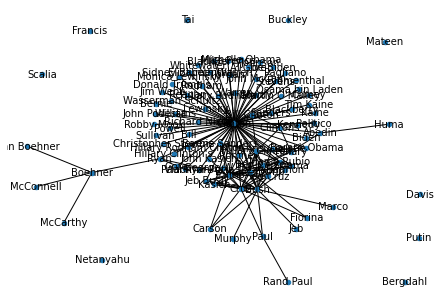

In [82]:
# draw
nx.draw(G, pos, with_labels=True, node_size=20, font_size=10)
# save 
#plt.savefig("network.png", dpi=300, bbox_inches="tight")

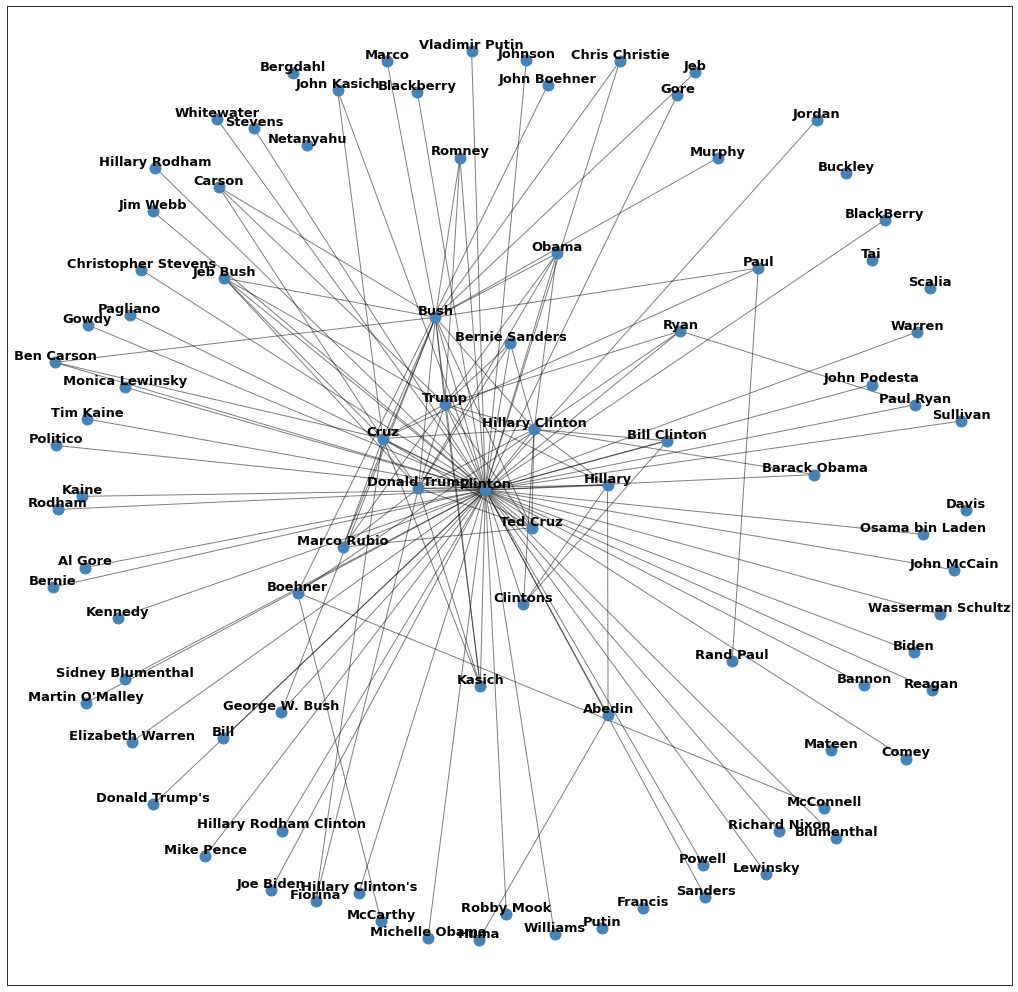

In [133]:
plt.figure(figsize=(18,18))
spring_layout = nx.spring_layout(G, k=math.sqrt(G.order()))
nx.draw_networkx_labels(G, spring_layout, font_size=13, verticalalignment="bottom", font_weight="semibold")
nx.draw_networkx_edges(G, spring_layout, alpha = 0.5)
nx.draw_networkx_nodes(G, spring_layout, node_size=120, node_color="steelblue")
plt.show()

<bound method Graph.order of <networkx.classes.graph.Graph object at 0x7f33715ddef0>>

### Centrality measures

In [ ]:
bc_metric = nx.betweenness_centrality(G)
ev_metric = nx.eigenvector_centrality(G)
bc_metric

In [ ]:
pd.DataFrame(bc_metric.items(), columns=["node", "betweennnes"]).sort_values("betweennnes", ascending=False)

In [ ]:
pd.DataFrame(ev_metric.items(), columns=["node", "eigenvector"]).sort_values("eigenvector", ascending=False)

In [ ]:
pd.read_csv("../assignments/4-network/output/centrality_measures.csv")